Part 0: Importing Required Modules

In [3]:
# Importing Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Part 1: Reading the CSV File and Displaying Info

In [4]:
# Read the CSV File
df = pd.read_csv('Housing.csv')

# Displaying the Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Part 2: Filling in Missing Data and Removing Outliers

In [5]:
# 2.1: Filling in Missing Data: Median for numeric data and Mode for non-numeric data

# Iterate through each column
for column in df.columns:
    if df[column].isnull().any():  # Check if the column has missing values
        if df[column].dtype in ['int64', 'float64']:  # Numeric columns
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)
        else:  # Non-numeric columns (categorical or text)
            mode_value = df[column].mode()[0]  # mode() returns a Series, so take the first one
            df[column].fillna(mode_value, inplace=True)


# Checking the Filling in Status: True if there are null values, False if there are no null values (Missing Data)
print(df.isnull().values.any())

print('There are Still Missing Data') if df.isnull().values.any() else print('There is no Missing Data')


False
There is no Missing Data


C:\Users\Ali\AppData\Local\Temp\ipykernel_8352\2440122925.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)
C:\Users\Ali\AppData\Local\Temp\ipykernel_8352\2440122925.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [6]:
# 2.2: Using Label Encoder to Covert Categorical data to Numerical

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Loop through each column and apply LabelEncoder to non-numeric columns
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        df[column] = le.fit_transform(df[column])

# Printing the updated DataFrame
print(df.head())


   Order        PID  MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street  \
0      1  526301100           20          5         141.0     31770       1   
1      2  526350040           20          4          80.0     11622       1   
2      3  526351010           20          5          81.0     14267       1   
3      4  526353030           20          5          93.0     11160       1   
4      5  527105010           60          5          74.0     13830       1   

   Alley  Lot Shape  Land Contour  ...  Pool Area  Pool QC  Fence  \
0      0          0             3  ...          0        0      2   
1      0          3             3  ...          0        0      2   
2      0          0             3  ...          0        0      2   
3      0          3             3  ...          0        0      2   
4      0          0             3  ...          0        0      2   

   Misc Feature  Misc Val  Mo Sold  Yr Sold  Sale Type  Sale Condition  \
0             3         0        5  

In [7]:
# 2.3: Clipping (Winsorization) Outlier Data

# Get numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Apply IQR clipping
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace values outside bounds
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

# Show the first few rows to verify
print(df.head())

   Order        PID  MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street  \
0      1  526301100           20          5         105.0  17727.75       1   
1      2  526350040           20          5          80.0  11622.00       1   
2      3  526351010           20          5          81.0  14267.00       1   
3      4  526353030           20          5          93.0  11160.00       1   
4      5  527105010           60          5          74.0  13830.00       1   

   Alley  Lot Shape  Land Contour  ...  Pool Area  Pool QC  Fence  \
0      0          0             3  ...          0        0      2   
1      0          3             3  ...          0        0      2   
2      0          0             3  ...          0        0      2   
3      0          3             3  ...          0        0      2   
4      0          0             3  ...          0        0      2   

   Misc Feature  Misc Val  Mo Sold  Yr Sold  Sale Type  Sale Condition  \
0             3         0        5  

In [ ]:
# 2.4: Check if Outlier Still Remained

# Get numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Flag to track if any outliers exist
outliers_exist = False

# Check for outliers in each numeric column
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    num_outliers = len(outliers)

    if num_outliers > 0:
        outliers_exist = True
        print(f"{column}: {num_outliers} outliers still present")

if not outliers_exist:
    print("No outliers remain in the dataset based on IQR method.")

No outliers remain in the dataset based on IQR method.


Part 3: Describing Data Frame

In [9]:
df.describe()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930.0,2930.000000,2930.000000,2930.0,2930.0,2930.000000,2930.0,...,2930.0,2930.0,2930.0,2930.0,2930.0,2930.000000,2930.000000,2930.0,2930.0,2930.000000
mean,1465.50000,7.144645e+08,55.585324,5.0,68.415017,9559.384044,1.0,0.0,1.940273,3.0,...,0.0,0.0,2.0,3.0,0.0,6.216041,2007.790444,9.0,4.0,177082.283959
std,845.96247,1.887308e+08,37.943108,0.0,17.042927,3621.156578,0.0,0.0,1.412105,0.0,...,0.0,0.0,0.0,0.0,0.0,2.714492,1.316613,0.0,0.0,67906.837135
min,1.00000,5.263011e+08,20.000000,5.0,33.000000,1300.000000,1.0,0.0,0.000000,3.0,...,0.0,0.0,2.0,3.0,0.0,1.000000,2006.000000,9.0,4.0,12789.000000
25%,733.25000,5.284770e+08,20.000000,5.0,60.000000,7440.250000,1.0,0.0,0.000000,3.0,...,0.0,0.0,2.0,3.0,0.0,4.000000,2007.000000,9.0,4.0,129500.000000
50%,1465.50000,5.354536e+08,50.000000,5.0,68.000000,9436.500000,1.0,0.0,3.000000,3.0,...,0.0,0.0,2.0,3.0,0.0,6.000000,2008.000000,9.0,4.0,160000.000000
75%,2197.75000,9.071811e+08,70.000000,5.0,78.000000,11555.250000,1.0,0.0,3.000000,3.0,...,0.0,0.0,2.0,3.0,0.0,8.000000,2009.000000,9.0,4.0,213500.000000
max,2930.00000,1.007100e+09,145.000000,5.0,105.000000,17727.750000,1.0,0.0,3.000000,3.0,...,0.0,0.0,2.0,3.0,0.0,12.000000,2010.000000,9.0,4.0,339500.000000


Part 4: Calculating Correlation Matrix

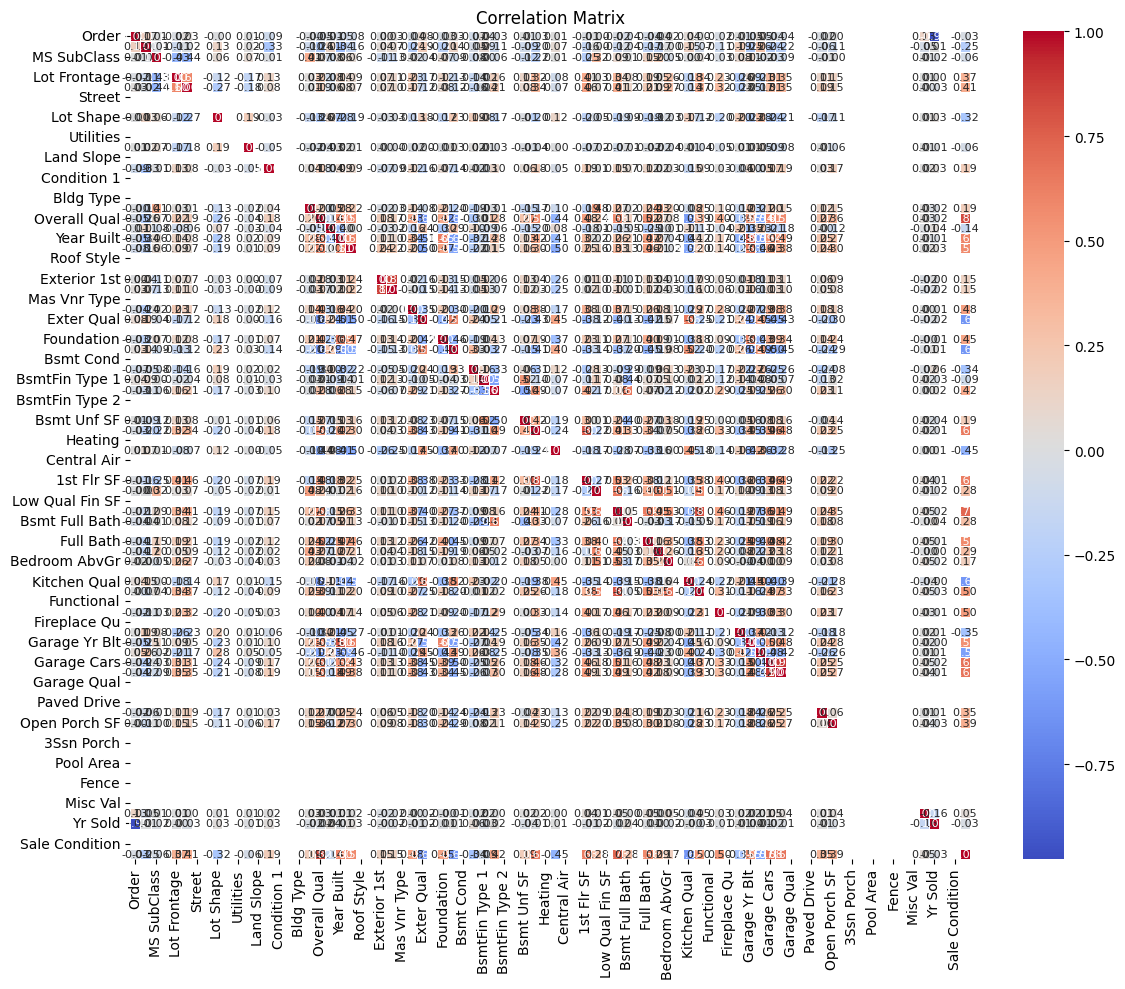

Top features with absolute correlation >= 0.5 with SalePrice:
 Overall Qual      0.822562
Gr Liv Area       0.726883
Garage Cars       0.682791
Garage Area       0.668274
Total Bsmt SF     0.648421
1st Flr SF        0.633557
Year Built        0.603326
Full Bath         0.577692
Year Remod/Add    0.575350
Garage Yr Blt     0.547851
TotRms AbvGrd     0.504171
Garage Finish    -0.572918
Kitchen Qual     -0.617041
Bsmt Qual        -0.625327
Exter Qual       -0.630257
Name: SalePrice, dtype: float64


C:\Users\Ali\AppData\Local\Temp\ipykernel_8352\1175479653.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_features.values, y=top_features.index, palette=palette)


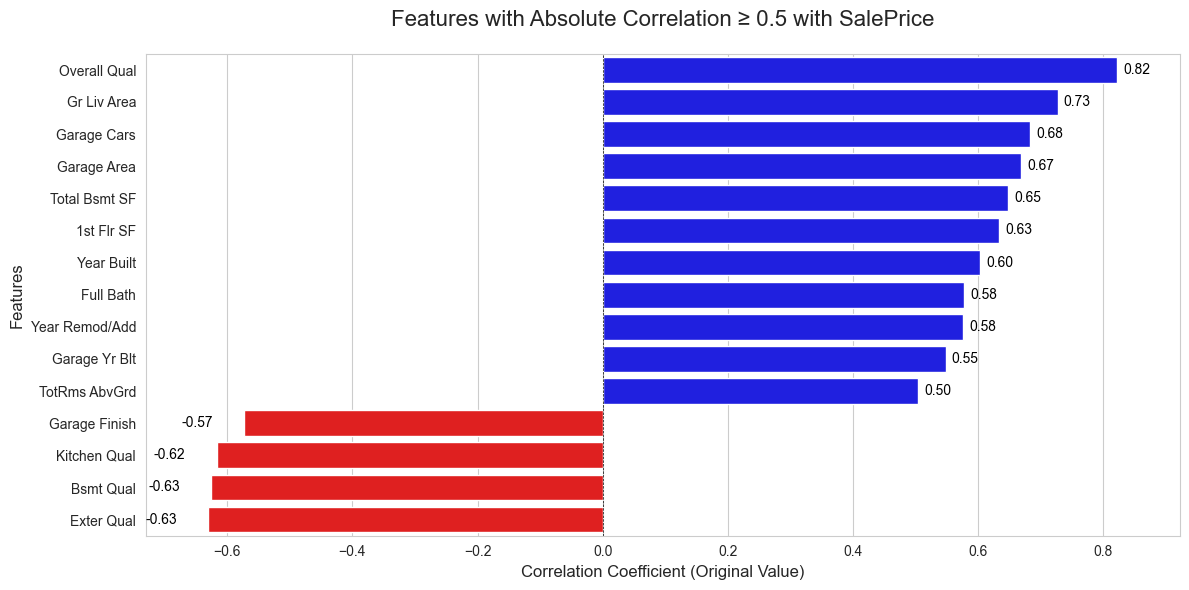

In [10]:
# 4.1: Ensuring SalePrice is Existing in Dataset
if 'SalePrice' not in df.columns:
    raise ValueError("SalePrice is not Present in Dataset!")


# 4.2: Ensuring At Least 2 Numeric Columns are available in Dataset to Calculate Correlation Matrix
if len(numeric_cols) < 2:
    raise ValueError("At Least 2 Numerical Columns are required to Calculate Correlation Matrix!")

# 4.3: Calculate Correlation Matrix
corr_matrix = df[numeric_cols].corr()

# 4.4: Display Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            annot_kws={"size": 8}, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# 4.5: Get top features by absolute correlation (0.5 and higher)
# Get absolute correlations and sort
abs_corr = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
# Filter features with correlation >= 0.5 (excluding SalePrice itself)
top_features_abs = abs_corr[(abs_corr >= 0.5) & (abs_corr.index != 'SalePrice')]
# Get original correlation values (with signs) for these features
top_features = corr_matrix['SalePrice'][top_features_abs.index].sort_values(ascending=False)

print("Top features with absolute correlation >= 0.5 with SalePrice:\n", top_features)

# 4.6: Displaying Barplot showing original correlation values
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Use palette to distinguish positive/negative correlations
palette = ['red' if x < 0 else 'blue' for x in top_features.values]
barplot = sns.barplot(x=top_features.values, y=top_features.index, palette=palette)

# Noting Correlation Coefficient on each bar (with original sign)
for i, v in enumerate(top_features.values):
    color = 'black' if abs(v) < 0.9 else 'white'  # better visibility
    barplot.text(v + 0.01 if v >=0 else v - 0.05, 
                 i, 
                 f"{v:.2f}", 
                 color=color, 
                 ha="left" if v >=0 else "right", 
                 va="center")

# Adjust xlim to accommodate negative values
x_min = min(top_features.values) - 0.1
x_max = max(top_features.values) + 0.1
plt.xlim(x_min, x_max)

plt.title('Features with Absolute Correlation ≥ 0.5 with SalePrice', fontsize=16, pad=20)
plt.xlabel('Correlation Coefficient (Original Value)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)  # Add zero line
plt.tight_layout()

plt.show()

Part 5: Joint Plot for Top Features

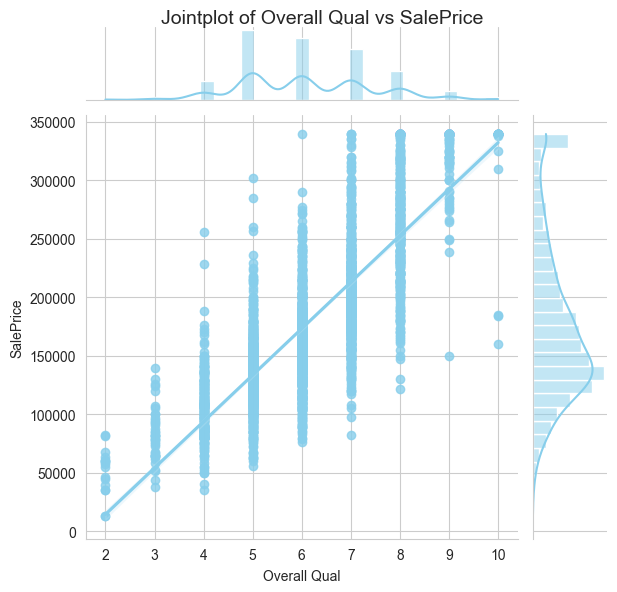

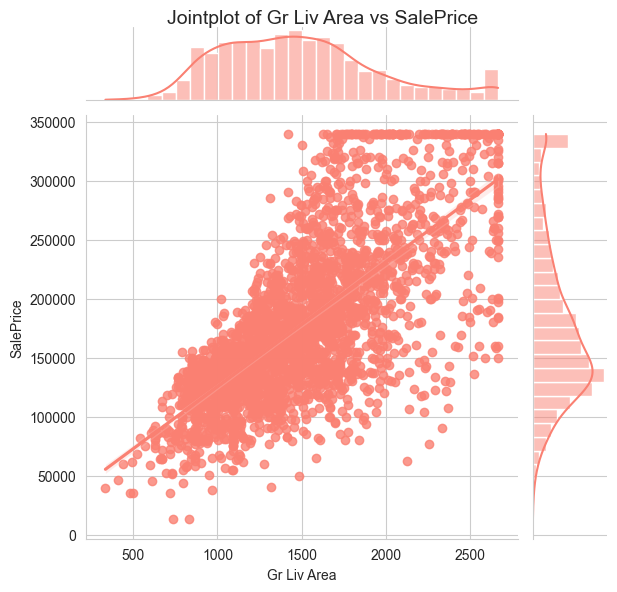

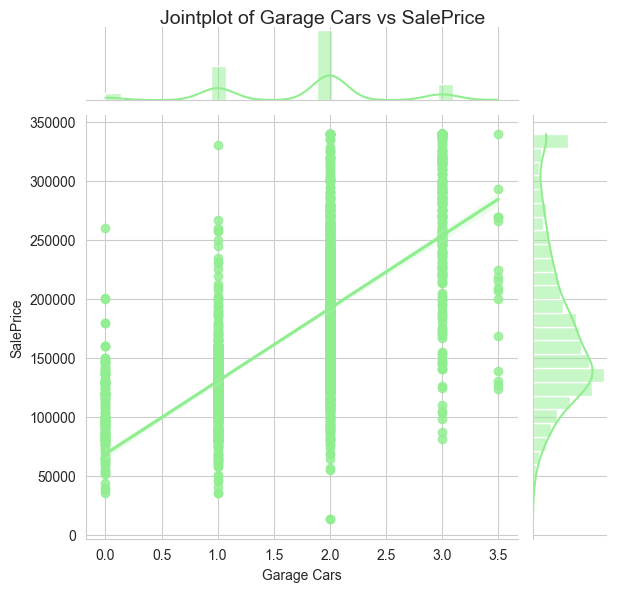

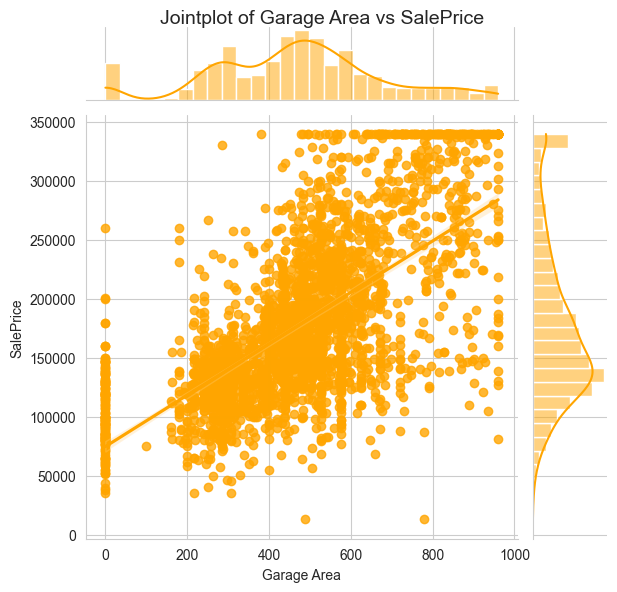

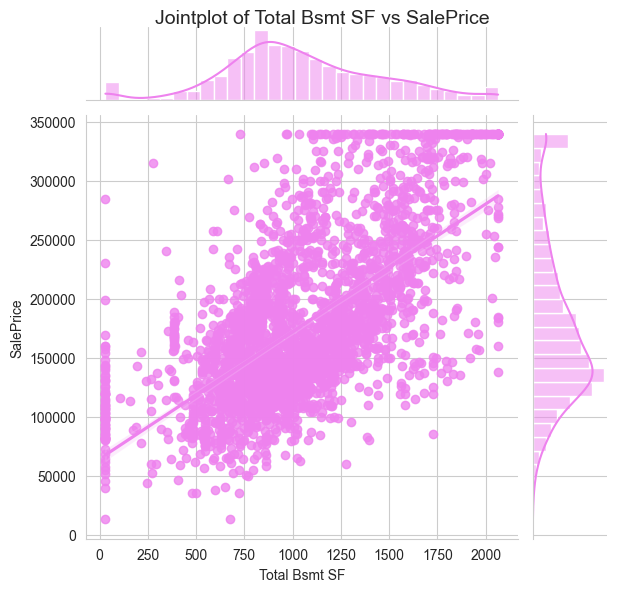

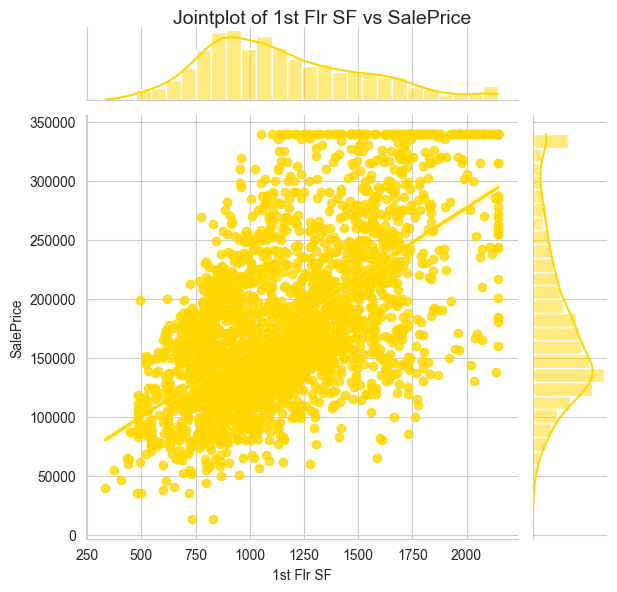

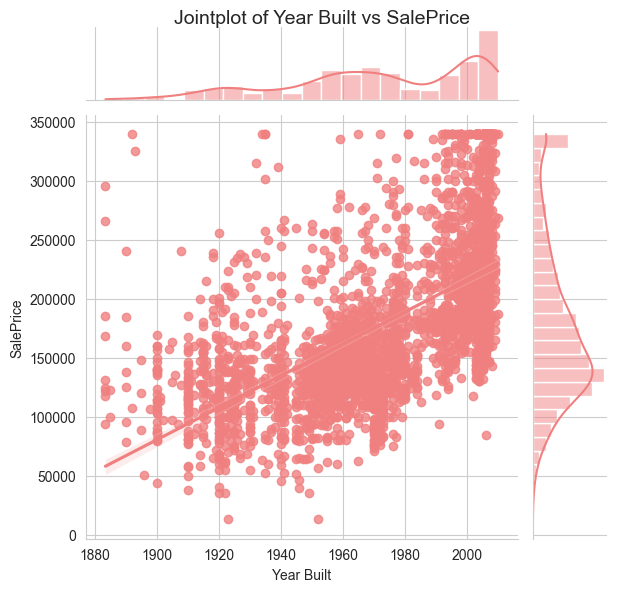

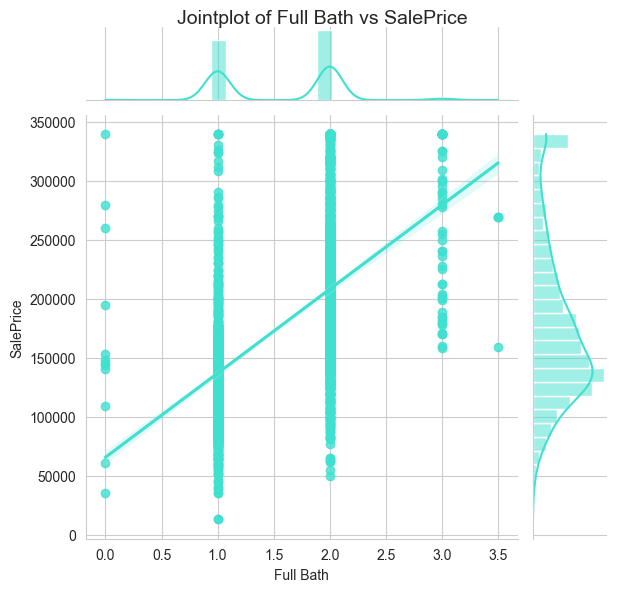

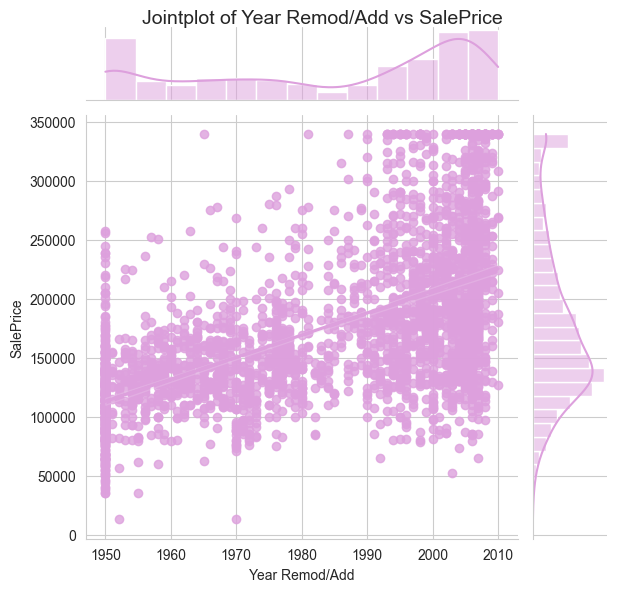

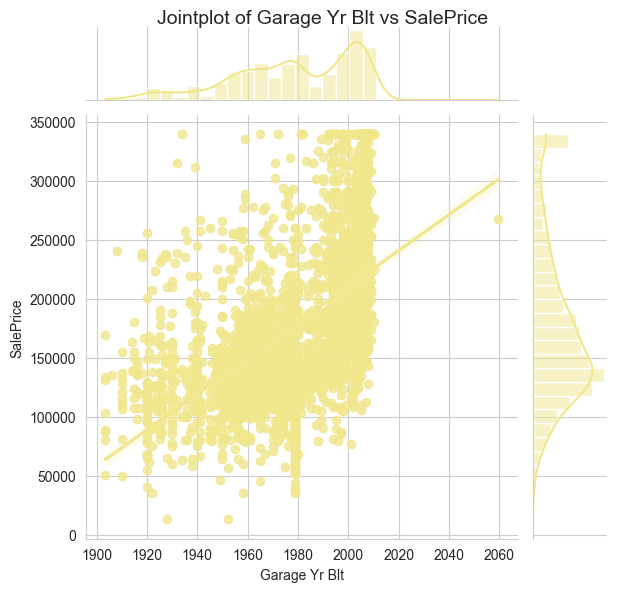

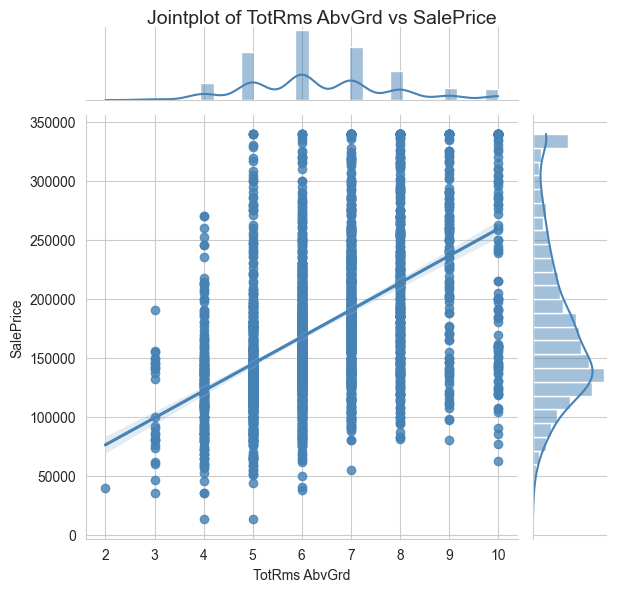

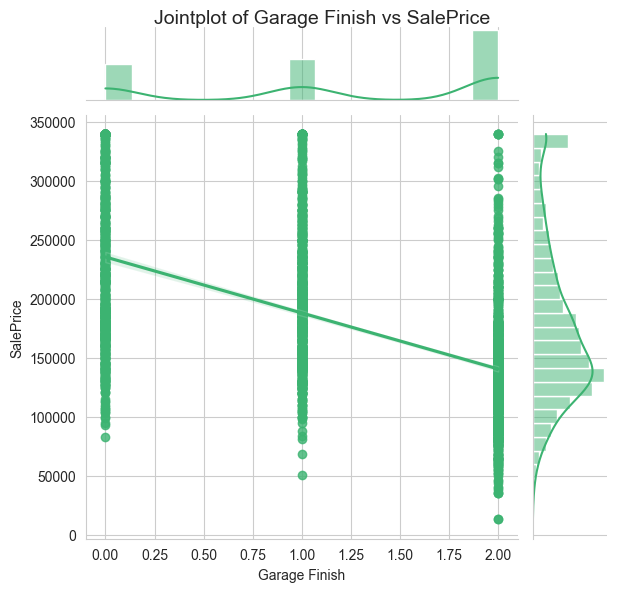

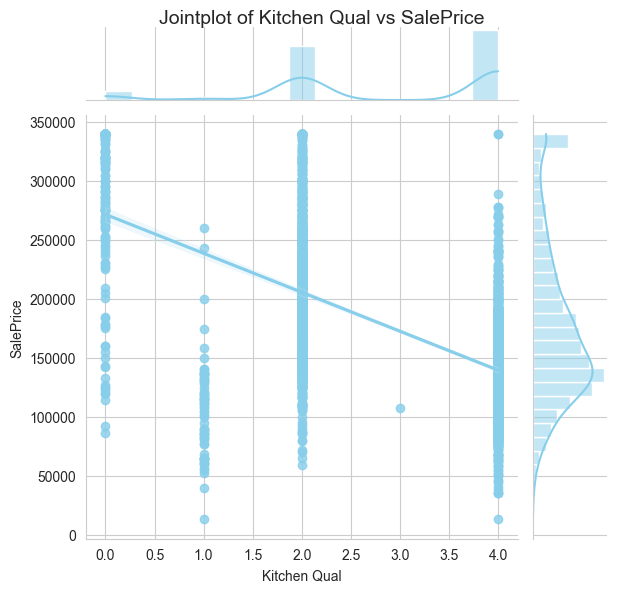

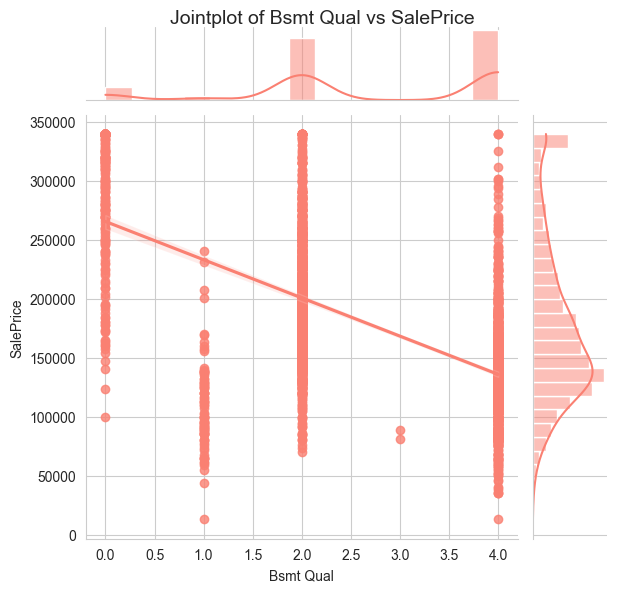

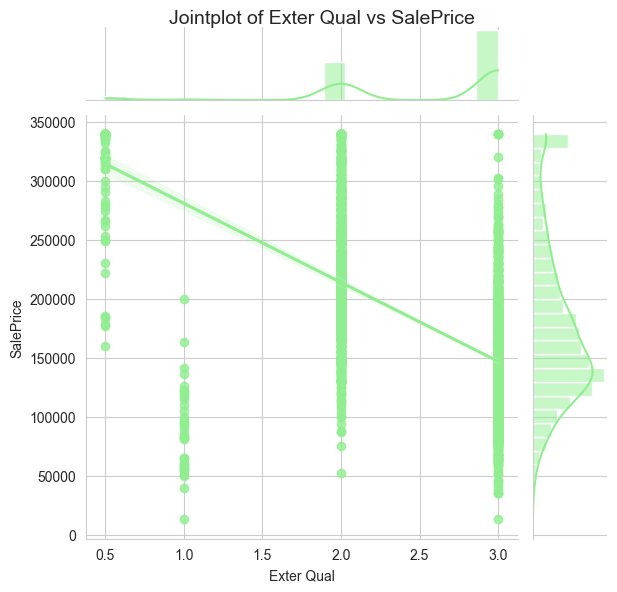

In [11]:
# Plotting Jointplots for Features Highly Correlated with SalePrice

# Define a list of distinct colors
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'violet',
          'gold', 'lightcoral', 'turquoise', 'plum', 'khaki', 
          'steelblue', 'mediumseagreen']

# Loop through each feature and assign a unique color
for i, feature in enumerate(top_features.index):
    color = colors[i % len(colors)]  # Cycle through colors if there are more features than colors
    
    # Create jointplot with a unique color
    sns.jointplot(data=df, x=feature, y='SalePrice', kind='reg', height=6, color=color)
    
    # Add a title
    plt.suptitle(f'Jointplot of {feature} vs SalePrice', fontsize=14)
    
    # Adjust the title position
    plt.subplots_adjust(top=0.95)
    
    # Show the plot
    plt.show()


Part 6: SelectKBest to Select the Appropriate Number of Features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Try different values of k and evaluate model performance
for k in range(1, X.shape[1] + 1):
    selector = SelectKBest(score_func=f_regression, k=k)
    X_new = selector.fit_transform(X, y)
    
    model = LinearRegression()
    scores = cross_val_score(model, X_new, y, cv=5, scoring='r2')
    
    print(f"k = {k}, R² score = {np.mean(scores):.4f}")

k = 1, R² score = 0.6725
k = 2, R² score = 0.7679
k = 3, R² score = 0.7941
k = 4, R² score = 0.7987
k = 5, R² score = 0.8258
k = 6, R² score = 0.8264
k = 7, R² score = 0.8345
k = 8, R² score = 0.8419
k = 9, R² score = 0.8477
k = 10, R² score = 0.8547
k = 11, R² score = 0.8558
k = 12, R² score = 0.8580
k = 13, R² score = 0.8596
k = 14, R² score = 0.8598
k = 15, R² score = 0.8603
k = 16, R² score = 0.8667
k = 17, R² score = 0.8670
k = 18, R² score = 0.8678
k = 19, R² score = 0.8677
k = 20, R² score = 0.8752
k = 21, R² score = 0.8820
k = 22, R² score = 0.8820
k = 23, R² score = 0.8821
k = 24, R² score = 0.8821
k = 25, R² score = 0.8827
k = 26, R² score = 0.8830
k = 27, R² score = 0.8833
k = 28, R² score = 0.8833
k = 29, R² score = 0.8835
k = 30, R² score = 0.8832
k = 31, R² score = 0.8833
k = 32, R² score = 0.8833
k = 33, R² score = 0.8842
k = 34, R² score = 0.8845
k = 35, R² score = 0.8847
k = 36, R² score = 0.8847
k = 37, R² score = 0.8849
k = 38, R² score = 0.8912
k = 39, R² score = 0.

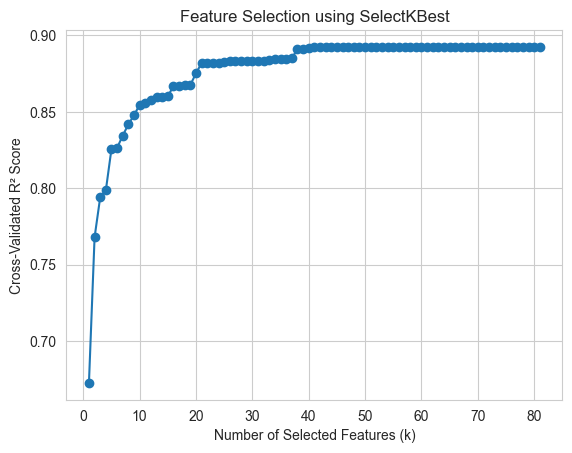

In [13]:
r2_scores = []

for k in range(1, X.shape[1] + 1):
    selector = SelectKBest(score_func=f_regression, k=k)
    X_new = selector.fit_transform(X, y)
    
    model = LinearRegression()
    scores = cross_val_score(model, X_new, y, cv=5, scoring='r2')
    
    r2_scores.append(np.mean(scores))

plt.plot(range(1, X.shape[1] + 1), r2_scores, marker='o')
plt.xlabel('Number of Selected Features (k)')
plt.ylabel('Cross-Validated R² Score')
plt.title('Feature Selection using SelectKBest')
plt.grid(True)
plt.show()

In [14]:
from sklearn.feature_selection import SelectKBest, f_regression

# Assume df is the preprocessed DataFrame
# Replace 'target' with the actual name of your target variable column

X = df.drop('SalePrice', axis=1)  # Features
y = df['SalePrice']               # Target variable

# Select top K best features using f_regression
k = 50  # Number of top features to select
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# To get the names of the selected features:
selected_features = X.columns[selector.get_support()]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Lot Config', 'Neighborhood', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Foundation', 'Bsmt Qual',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', '1st Flr SF', '2nd Flr SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Pool QC', 'Fence',
       'Misc Feature', 'Misc Val', 'Mo Sold', 'Yr Sold', 'Sale Type',
       'Sale Condition'],
      dtype='object')


Part 7: Dividing the Data: Train and Test

In [15]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined and X has all features
# Apply SelectKBest with k=50
selector = SelectKBest(score_func=f_regression, k=50)
X_selected = selector.fit_transform(X, y)

# Split the data: 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.25, random_state=42
)

# Optional: print shapes to verify
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (2197, 50)
Test set shape: (733, 50)


Part 8: Training Models: Linear Regression, Lasso Regression, Ridge Regression, and Polynomial Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# 2. Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

# 3. Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# 4. Polynomial Regression (using degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)


C:\Users\Ali\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.881e+11, tolerance: 9.768e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ali\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.27951e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Part 9: RMS and R² Score

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Linear Regression
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

# Lasso Regression
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

# Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

# Polynomial Regression
y_pred_poly = poly_model.predict(X_test)
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

# Display the results
print("Model Performance on Test Set:")
print(f"Linear Regression     -> R²: {r2_linear:.6f},  RMSE: {rmse_linear:.4f}")
print(f"Lasso Regression      -> R²: {r2_lasso:.6f},  RMSE: {rmse_lasso:.4f}")
print(f"Ridge Regression      -> R²: {r2_ridge:.6f},  RMSE: {rmse_ridge:.4f}")
print(f"Polynomial Regression -> R²: {r2_poly:.6f},  RMSE: {rmse_poly:.4f}")


Model Performance on Test Set:
Linear Regression     -> R²: 0.905180,  RMSE: 21940.4118
Lasso Regression      -> R²: 0.905187,  RMSE: 21939.6706
Ridge Regression      -> R²: 0.905192,  RMSE: 21939.0279
Polynomial Regression -> R²: 0.900646,  RMSE: 22458.8507


Part 10: Bias-Variance Trade-OFF Example

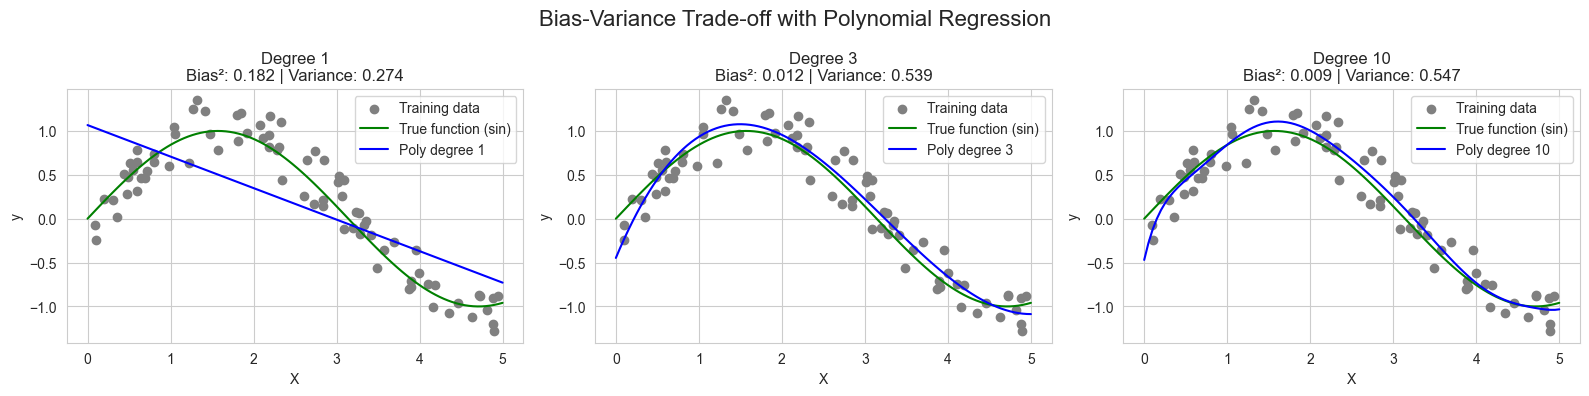

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Generate test set
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_true = np.sin(X_test).ravel()

# Try models of different polynomial degrees
degrees = [1, 3, 10]
plt.figure(figsize=(16, 4))

for i, degree in enumerate(degrees, 1):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X_test)

    # Compute bias^2 and variance on test set
    bias_squared = np.mean((y_true - y_pred) ** 2)
    variance = np.var(y_pred)

    # Plotting
    plt.subplot(1, 3, i)
    plt.scatter(X, y, color='gray', label='Training data')
    plt.plot(X_test, y_true, label='True function (sin)', color='green')
    plt.plot(X_test, y_pred, label=f'Poly degree {degree}', color='blue')
    plt.title(f"Degree {degree}\nBias²: {bias_squared:.3f} | Variance: {variance:.3f}")
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('y')

plt.suptitle("Bias-Variance Trade-off with Polynomial Regression", fontsize=16)
plt.tight_layout()
plt.show()
